<a href="https://colab.research.google.com/github/NiharikaAmritkar/AI-ML/blob/main/Cancer_classification_and_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('/content/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

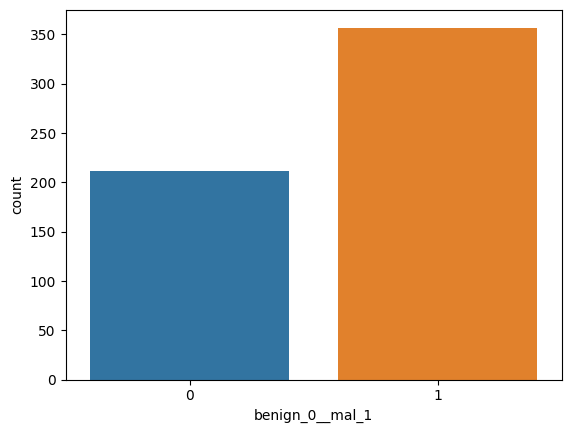

In [7]:
sns.countplot(x='benign_0__mal_1', data= df )

<Axes: >

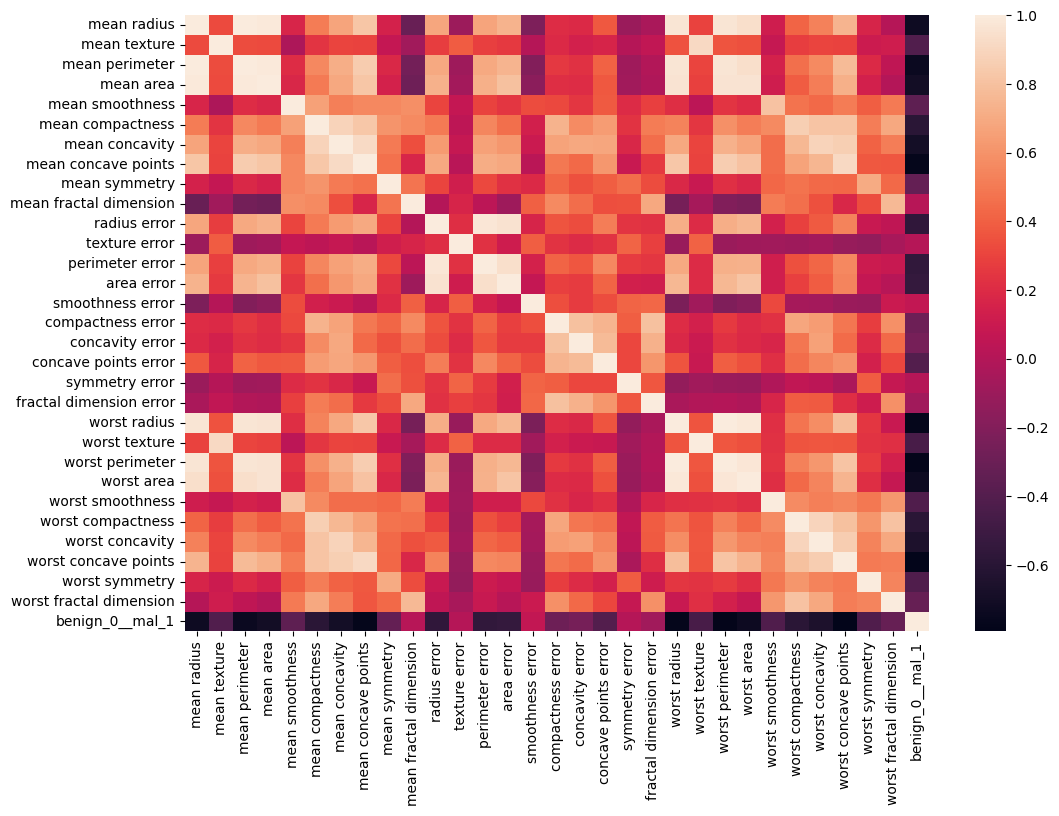

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr())

<Axes: >

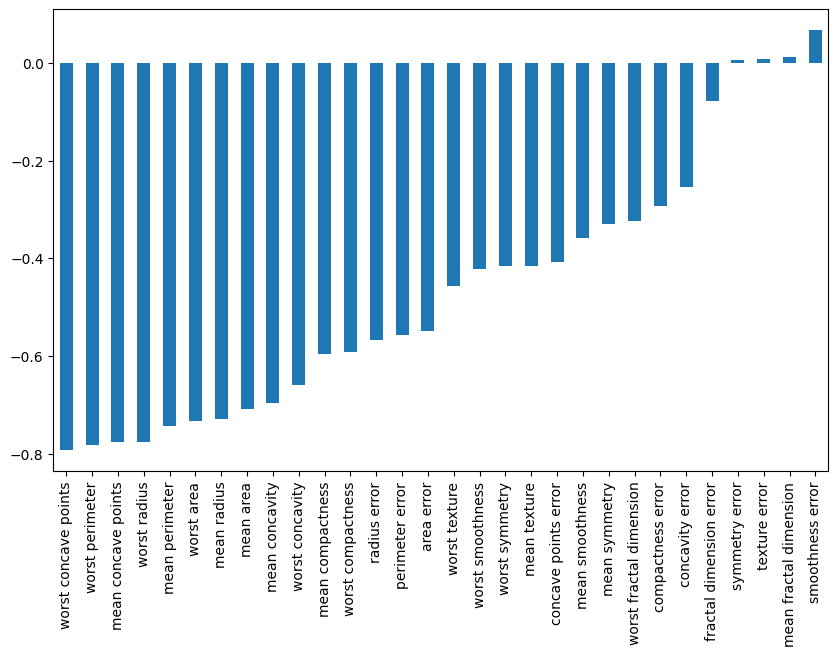

In [23]:
plt.figure(figsize=(10, 6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind= 'bar')

In [12]:
x= df.drop('benign_0__mal_1', axis= 1).values
y= df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state= 101)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [15]:
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [17]:
x_train.shape

(426, 30)

In [18]:
model= Sequential()
model.add(Dense(30, activation= 'relu'))
model.add(Dense(15, activation= 'relu'))

#BINARY CLASSIFICATION, THEREFOE ACTIVATION= SIGMOID IN THE OUTPUT LAYER
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [19]:
model.fit(x= x_train, y= y_train, epochs= 600, validation_data= (x_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6620 - val_loss: 0.6358
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6233 - val_loss: 0.5965
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5839 - val_loss: 0.5522
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5376 - val_loss: 0.5004
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4870 - val_loss: 0.4465
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4339 - val_loss: 0.3929
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3822 - val_loss: 0.3434
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3372 - val_loss: 0.3016
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3003 - val_loss: 0.2673
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2698 - val_loss: 0.2411
Epoch 11

In [25]:
losses= pd.DataFrame(model.history.history)

In [28]:
losses

,loss,val_loss
0,0.661987,0.635752
1,0.623250,0.596540
2,0.583882,0.552204
3,0.537594,0.500393
4,0.486973,0.446500
...,...,...
595,0.012627,0.279897
596,0.014870,0.293996
597,0.016414,0.355514
598,0.015129,0.284559


<Axes: >

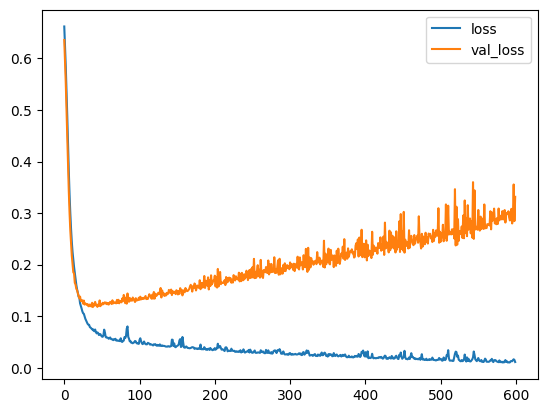

In [27]:
losses.plot() #it is overfitting our training dataset

In [29]:
#inorder to stop overfitting, we will be using callbacks.. we will redine our model
model= Sequential()
model.add(Dense(30, activation= 'relu'))
model.add(Dense(15, activation= 'relu'))

#BINARY CLASSIFICATION, THEREFOE ACTIVATION= SIGMOID IN THE OUTPUT LAYER
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 25)

In [32]:
model.fit(x= x_train, y= y_train, epochs= 600, validation_data= (x_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6750 - val_loss: 0.6567
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6404 - val_loss: 0.6217
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6034 - val_loss: 0.5844
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5649 - val_loss: 0.5460
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5264 - val_loss: 0.5059
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4853 - val_loss: 0.4635
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4439 - val_loss: 0.4210
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4037 - val_loss: 0.3805
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3642 - val_loss: 0.3400
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3305 - val_loss: 0.3070
Epoch 11

In [33]:
loss1= pd.DataFrame(model.history.history)

In [34]:
loss1

,loss,val_loss
0,0.675047,0.656676
1,0.640355,0.621700
2,0.603386,0.584371
3,0.564876,0.545960
4,0.526357,0.505907
...,...,...
73,0.053685,0.111089
74,0.053149,0.111410
75,0.056132,0.114261
76,0.054818,0.110175


<Axes: >

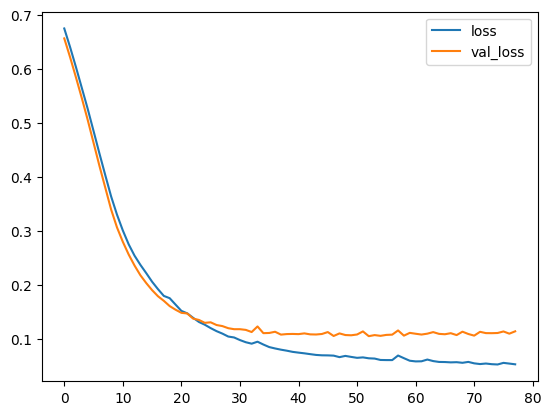

In [35]:
loss1.plot()

In [36]:
from tensorflow.keras.layers import Dropout

In [38]:
model= Sequential()
model.add(Dense(30, activation= 'relu'))
model.add(Dropout(0.5)) #added droupout layers to randomnly switch ooff 50% of the neurons
model.add(Dense(15, activation= 'relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION, THEREFOE ACTIVATION= SIGMOID IN THE OUTPUT LAYER
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer= 'adam')

In [39]:
model.fit(x= x_train, y= y_train, epochs= 600, validation_data= (x_test, y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6869 - val_loss: 0.6723
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6572 - val_loss: 0.6507
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6534 - val_loss: 0.6234
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.5893
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6074 - val_loss: 0.5619
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5859 - val_loss: 0.5372
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5476 - val_loss: 0.5094
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5528 - val_loss: 0.4851
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5136 - val_loss: 0.4566
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4972 - val_loss: 0.4230
Epoch 11

In [41]:
loss2= pd.DataFrame(model.history.history)

In [42]:
loss2

,loss,val_loss
0,0.686902,0.672315
1,0.657222,0.650749
2,0.653408,0.623364
3,0.629698,0.589272
4,0.607445,0.561876
...,...,...
152,0.082735,0.090946
153,0.071242,0.096551
154,0.105181,0.087437
155,0.094889,0.093998


<Axes: >

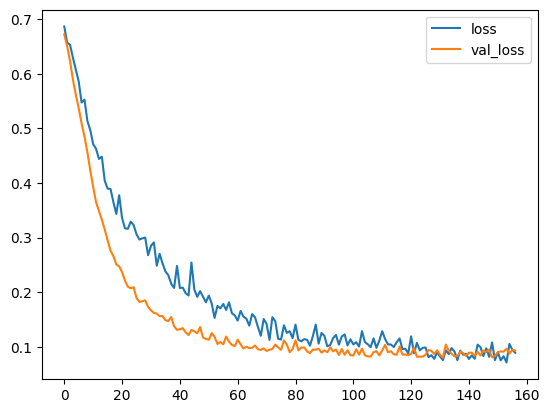

In [43]:
loss2.plot()

In [46]:
#this is classification problem, hence the model shoul classifiy 0 or 1
predictions = (model.predict(x_test) > 0.5)*1

5/5 [==============================] - 0s 4ms/step


In [47]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [50]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
